In [1]:
import pandas as pd

def read_data_to_dataframe(filename):
    data = {}
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.strip().split(': ')
            data[key] = float(value)

    df = pd.DataFrame.from_dict(data, orient='index', columns=['score'])
    return df

def join_dataframes(df1, df2, suffix1='_1', suffix2='_2'):
    # Rename 'score' columns before joining
    df1 = df1.rename(columns={'score': 'score' + suffix1})
    df2 = df2.rename(columns={'score': 'score' + suffix2})

    return df1.join(df2,  how='inner') 



In [7]:
zero_shot = read_data_to_dataframe("../output.txt")
segmentation = read_data_to_dataframe("../output_seg.txt")
segmentation_alt = read_data_to_dataframe("../output_zero_2.txt")
segmentation_alt = segmentation_alt.rename(columns={'score': 'zero shot [a photo of a traffic sign]' })
segmentation_alt2  = read_data_to_dataframe("../output_zero_3.txt")
segmentation_alt2 = segmentation_alt2.rename(columns={'score': 'zero shot [a sign]' })

df = join_dataframes(zero_shot, segmentation, " zero shot [a traffic sign]", " segmentation")
df = df.join(segmentation_alt,  how='inner')
df = df.join(segmentation_alt2,  how='inner')

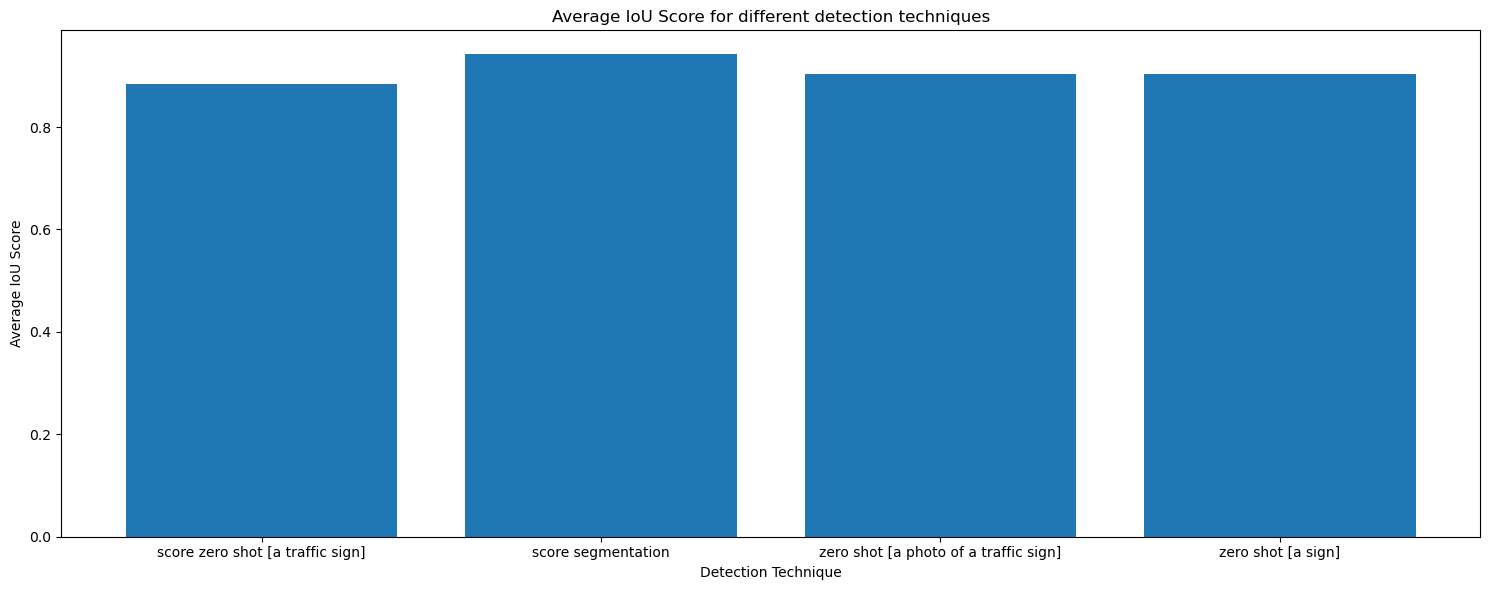

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_column_averages(df):
    """Plots a bar chart of the average values for each column in a DataFrame.

    Args:
        df: The DataFrame containing the columns to plot.
    """

    averages = df.mean()  # Calculate averages for each column

    plt.figure(figsize=(15, 6))  # Adjust figure size as needed

    plt.bar(averages.index, averages.values)
    plt.xlabel('Detection Technique')
    plt.ylabel('Average IoU Score')
    plt.title('Average IoU Score for different detection techniques')
#     plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
#     plt.ylim(bottom=0.80)  # Set the minimum y-value
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

plot_column_averages(df)

In [10]:
df.mean()

score zero shot [a traffic sign]         0.883716
score segmentation                       0.941702
zero shot [a photo of a traffic sign]    0.903392
zero shot [a sign]                       0.903392
dtype: float64

In [6]:
df.std()

score zero shot [a traffic sign]         0.117239
score segmentation                       0.055389
zero shot [a photo of a traffic sign]    0.099870
dtype: float64